### 随机梯度下降
1. 罗宾斯-门罗算法收敛性验证
    公式：$ w_{k+1} = w_k +a_k * g(w,η) $  其中 $ a_k 是学习率 $

进过69次迭代，w最终收敛于:1.000826441417033


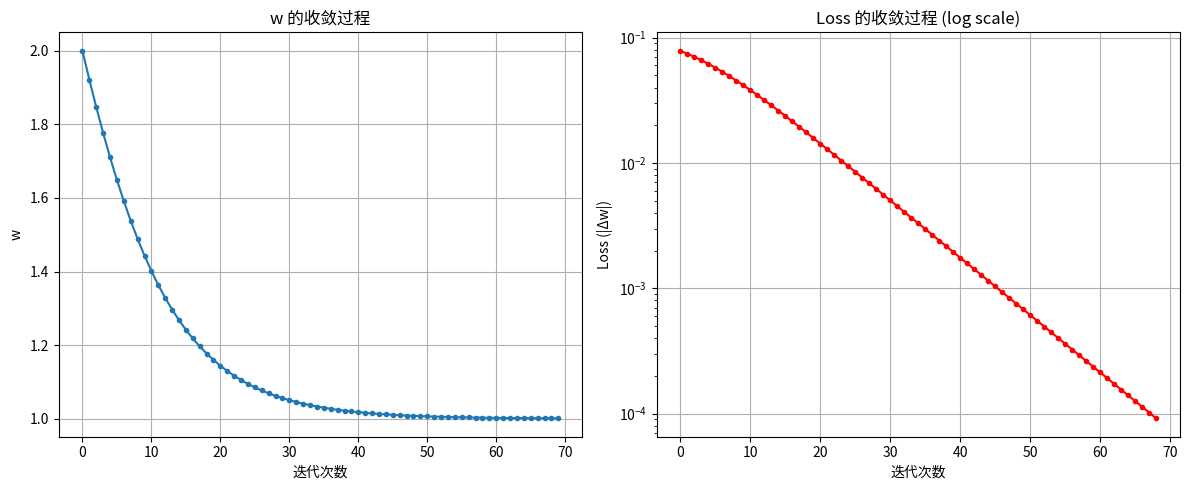

In [234]:
import math
import matplotlib as mpl
mpl.rcParams.update({
    'font.sans-serif': ['Noto Sans CJK JP'],  # 或 WenQuanYi Zen Hei + 避免 \u2212
    'axes.unicode_minus': False,
    'mathtext.fontset': 'stix'
})
import matplotlib.pyplot as plt
# 学习率
learning_rate = 0.1
# 误差
min_loss = 0.0001
# 初始误差
loss = 999999
# 初始w
w = 2
# 次数
count = 0

# 记录公式收敛过程
w_history = [w]
loss_history = []
while loss > min_loss:
    gw = math.atan(w - 1)
    w_next = w - learning_rate * gw
    loss = abs(w_next -w)
    w = w_next

    loss_history.append(loss)
    w_history.append(w)
    count += 1
print(f'进过{count}次迭代，w最终收敛于:{w}')

# 绘图
plt.figure(figsize=(12, 5))

# 子图1：w 的变化过程
plt.subplot(1, 2, 1)
plt.plot(w_history, marker='o', markersize=3, linestyle='-')
plt.title('w 的收敛过程')
plt.xlabel('迭代次数')
plt.ylabel('w')
plt.grid(True)

# 子图2：loss 的变化过程（对数坐标更清晰）
plt.subplot(1, 2, 2)
plt.plot(loss_history, marker='o', markersize=3, linestyle='-', color='red')
plt.yscale('log')  # 使用对数坐标，因为 loss 下降很快
plt.title('Loss 的收敛过程 (log scale)')
plt.xlabel('迭代次数')
plt.ylabel('Loss (|Δw|)')
plt.grid(True)

plt.tight_layout()
plt.show()

2.随机梯度下降算法 SGD

SGD经过1000次迭代，w收敛于2.16738033711457,b收敛于0.6908590465539889
w收敛于0.036728976970371516,b收敛于0.002149753053285666
训练结束


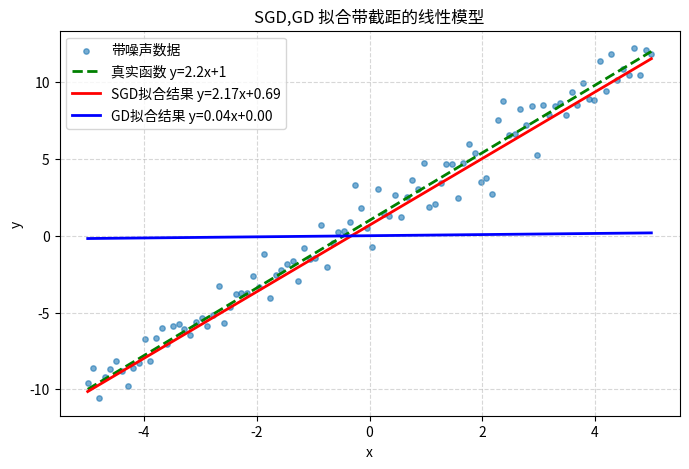

In [301]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数 f(x)
def f(x):
    return 2.2 * x + 1 # 例如线性函数

# 生成 x
x = np.linspace(-5, 5, 100)

# 生成带噪声的 y
# 设置参数
mu = 0.0      # 均值
sigma = 1.0   # 标准差
n = 1000    # 点的数量
noises = np.random.normal(loc=mu, scale=sigma, size=x.shape)  # 噪声 ~ N(0, 1)
y = f(x) + noises

points = np.column_stack((x, y))


# 使用这些点来做SGD，看是否能找到这条直线
# 定义损失函数,预测值与真实值的差
# 模型预测
def predict(w, b, x):
    return w * x + b

def loss(w,x,y,b):
    return 0.5 * (predict(w,b,x) - y) **2

# 定义梯度
def loss_gradient_w(w,x,y,b):
    return (predict(w,b,x) - y)*x

def loss_gradient_b(w,x,y,b):
    return predict(w, b, x) - y


# 初始权重
w = 0
b = 0
loss_n = 9999
loss_min = 0.0001
# 学习率
learning_rate = 0.001
# 最大迭代次数
max_iterate = 1000
# 计数器
count = 0
while max_iterate > 0:
    # 随机取样本点
    row = np.random.randint(0,len(points))
    x_sample = points[row,0]
    y_sample = points[row,1]

    # 预测值
    y_predict = w * x_sample
    # 计算梯度
    gradient_w = loss_gradient_w(w,x_sample,y_sample,b)
    gradient_b = loss_gradient_b(w,x_sample,y_sample,b)

    w = w - gradient_w * learning_rate
    b = b - gradient_b * learning_rate

    max_iterate -= 1
    count += 1

print(f'SGD经过{count}次迭代，w收敛于{w},b收敛于{b}')

# 初始化
gd_w = 0.0
gd_b = 0.0
learning_rate = 0.001
num_epochs = 1000

for epoch in range(num_epochs):
    total_grad_w = 0.0
    total_grad_b = 0.0

    # 遍历所有样本，累加梯度
    for x_i, y_i in points:
        pred = gd_w * x_i + gd_b
        total_grad_w += (pred - y_i) * x_i
        total_grad_b += (pred - y_i)

    # 计算平均梯度
    N = len(points)
    avg_grad_w = total_grad_w / N
    avg_grad_b = total_grad_b / N

    # 一次性更新参数
    gd_w -= learning_rate * avg_grad_w
    gd_b -= learning_rate * avg_grad_b

print(f'w收敛于{gd_w},b收敛于{gd_b}')
print(f'训练结束')

# 记录生成的数据

# 可视化
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=15, alpha=0.6, label='带噪声数据')
plt.plot(x, f(x), '--', color='green', linewidth=2, label='真实函数 y=2.2x+1')
plt.plot(x, w * x + b, color='red', linewidth=2, label=f'SGD拟合结果 y={w:.2f}x+{b:.2f}')
plt.plot(x, gd_w * x + gd_b, color='blue', linewidth=2, label=f'GD拟合结果 y={gd_w:.2f}x+{gd_b:.2f}')
plt.legend()
plt.title('SGD,GD 拟合带截距的线性模型')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()